In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

In [2]:
import os
print(os.getcwd())

/Users/sue/Documents/CASA/CASA0004/github


In [3]:
df = pd.read_csv("output/GVI_london.csv") 

In [4]:
df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Filter points where GSV was not successfully retrieved
missing_gsv = gdf[gdf['exists'] == 0]

buffered_london = gpd.read_file("output/inner_london_buffer.geojson")  # ← 请替换为你实际的缓冲区文件

gdf = gdf.to_crs(epsg=3857)
missing_gsv = missing_gsv.to_crs(epsg=3857)
buffered_london = buffered_london.to_crs(epsg=3857)

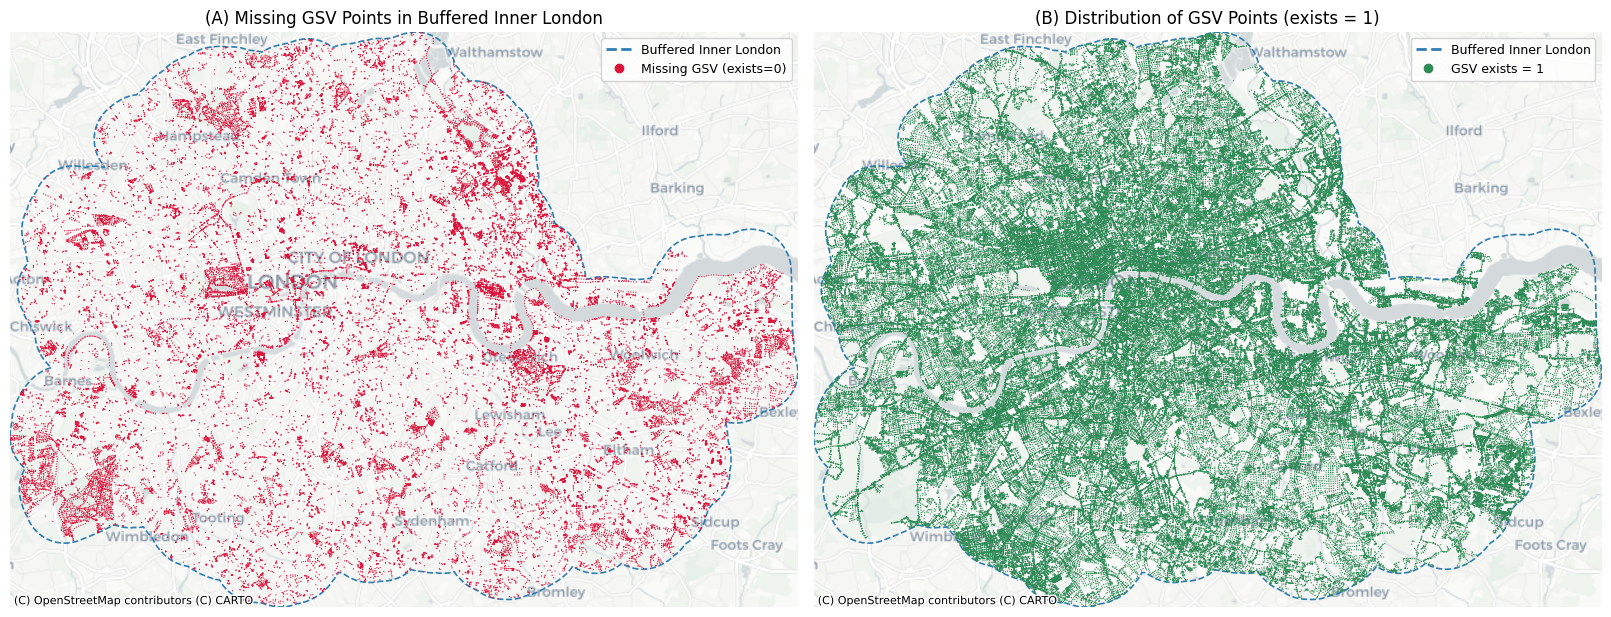

In [5]:
import os
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd

gdf_3857 = gdf.to_crs(epsg=3857)
missing_gsv = gdf_3857[gdf_3857['exists'] == 0]
exists_1   = gdf_3857[gdf_3857['exists'] == 1]
buffered_3857 = buffered_london.to_crs(epsg=3857)

xmin, ymin, xmax, ymax = buffered_3857.total_bounds
extent = (xmin, xmax, ymin, ymax)

# Plotting
os.makedirs("output/3", exist_ok=True)
fig, axes = plt.subplots(1, 2, figsize=(16, 9), constrained_layout=True)


MS = 0.8      
AL = 1     
BUFFER_EDGE = '#2d7db3'
BUFFER_LW = 1.2

from matplotlib.lines import Line2D

# Left panel (A): Missing points
ax = axes[0]
buffered_3857.boundary.plot(ax=ax, color=BUFFER_EDGE, linestyle='--', linewidth=BUFFER_LW,
                            label='Buffered Inner London')
missing_gsv.plot(ax=ax, color='crimson', markersize=MS, alpha=AL,
                 edgecolor='none', zorder=3)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_xlim(extent[0], extent[1]); ax.set_ylim(extent[2], extent[3])
ax.set_title("(A) Missing GSV Points in Buffered Inner London", fontsize=12)
ax.axis('off')

legend_A = [
    Line2D([0],[0], color=BUFFER_EDGE, lw=2, linestyle='--', label='Buffered Inner London'),
    Line2D([0],[0], marker='o', linestyle='None', markersize=6, color='crimson',
           label='Missing GSV (exists=0)')
]
ax.legend(handles=legend_A, loc='upper right', fontsize=9, frameon=True)

# Left panel (A): Missing points
ax = axes[1]
buffered_3857.boundary.plot(ax=ax, color=BUFFER_EDGE, linestyle='--', linewidth=BUFFER_LW,
                            label='Buffered Inner London')
exists_1.plot(ax=ax, color='seagreen', markersize=MS, alpha=AL,
              edgecolor='none', zorder=3)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_xlim(extent[0], extent[1]); ax.set_ylim(extent[2], extent[3])
ax.set_title("(B) Distribution of GSV Points (exists = 1)", fontsize=12)
ax.axis('off')
legend_B = [
    Line2D([0],[0], color=BUFFER_EDGE, lw=2, linestyle='--', label='Buffered Inner London'),
    Line2D([0],[0], marker='o', linestyle='None', markersize=6, color='seagreen',
           label='GSV exists = 1')
]
ax.legend(handles=legend_B, loc='upper right', fontsize=9, frameon=True)

# save
out = "output/3/gsv_exists_missing_side_by_side.png"
plt.savefig(out, dpi=300, bbox_inches="tight")
plt.show()


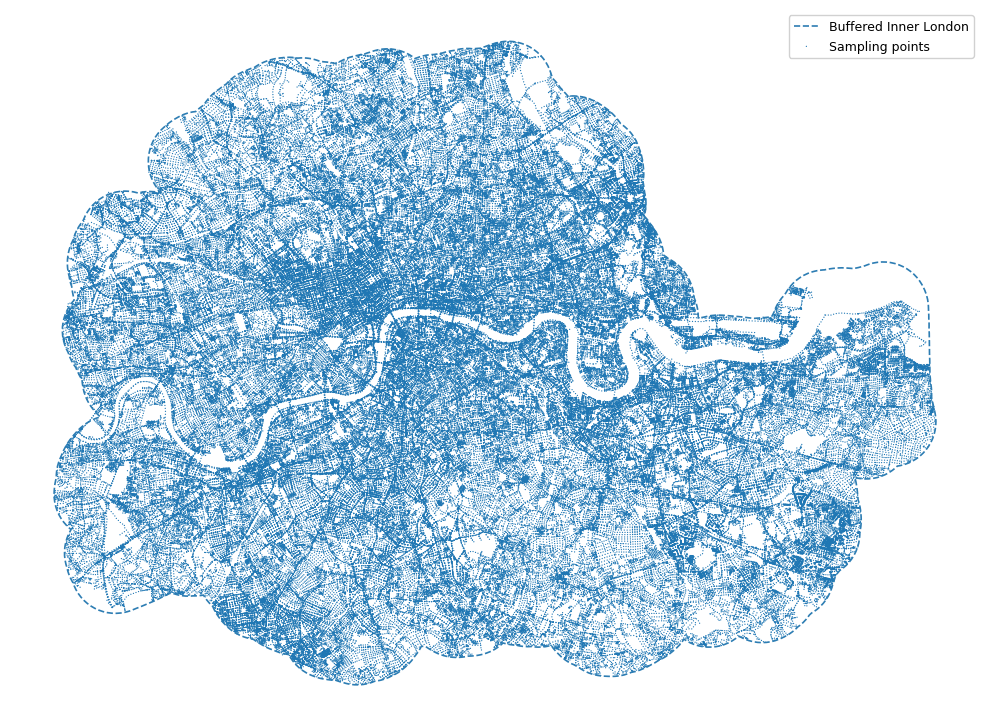

In [6]:
# All sampling points
import os
os.makedirs("output/3", exist_ok=True)

fig, ax = plt.subplots(figsize=(10, 10))

buffered_3857.boundary.plot(
    ax=ax, color="#2d7db3", linestyle="--", linewidth=1.2, label="Buffered Inner London"
)

gdf_3857.plot(
    ax=ax, color="#1f77b4", markersize=0.8, alpha=1, edgecolor="none", label="Sampling points"
)

ax.legend(loc="upper right", fontsize=9, frameon=True).get_frame().set_alpha(0.9)
ax.axis("off")
plt.tight_layout()

out_all = "output/3/sampling_points_all_no_basemap.png"
plt.savefig(out_all, dpi=300, bbox_inches="tight")
plt.show()

